Performing a multiple regression analysis to understand how multiple independent variables (year and country names) affect a dependent variable (agricultural production value) 

In [79]:
import pandas as pd
import statsmodels.api as sm
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [80]:
prod_ind_data = pd.read_csv('Dataset/archive/fao_data_production_indices_data.csv')
prod_ind_data['year']=prod_ind_data['year'].astype(pd.Int64Dtype())
agri_data = prod_ind_data[prod_ind_data['category']=='agriculture_pin']
agri_data.dropna(inplace=True)
agri_data

C:\Users\saumy\AppData\Local\Temp\ipykernel_10060\885747683.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agri_data.dropna(inplace=True)


,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2007,1000 Int. $,2486910.0,A,agriculture_pin
1,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2006,1000 Int. $,2278516.0,A,agriculture_pin
2,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2005,1000 Int. $,2524097.0,A,agriculture_pin
3,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2004,1000 Int. $,2226346.0,A,agriculture_pin
4,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2003,1000 Int. $,2289434.0,A,agriculture_pin
...,...,...,...,...,...,...,...,...
64091,Zimbabwe,438,Net per capita PIN (base 1999-2001),1965,Int. $,113.0,A,agriculture_pin
64092,Zimbabwe,438,Net per capita PIN (base 1999-2001),1964,Int. $,128.0,A,agriculture_pin
64093,Zimbabwe,438,Net per capita PIN (base 1999-2001),1963,Int. $,113.0,A,agriculture_pin
64094,Zimbabwe,438,Net per capita PIN (base 1999-2001),1962,Int. $,127.0,A,agriculture_pin


In [81]:
gross_prod_data = agri_data.drop(agri_data[agri_data['element'] != 'Gross Production 1999-2001 (1000 I$)'].index)
focused_data = gross_prod_data[['country_or_area', 'year', 'value']]
focused_data.columns = ['Country', 'Year', 'Gross_Production']
focused_data.head()

,Country,Year,Gross_Production
0,Afghanistan,2007,2486910.0
1,Afghanistan,2006,2278516.0
2,Afghanistan,2005,2524097.0
3,Afghanistan,2004,2226346.0
4,Afghanistan,2003,2289434.0


In [82]:
rel_data = focused_data[~focused_data.Country.str.endswith('+')]
rel_data

,Country,Year,Gross_Production
0,Afghanistan,2007,2486910.0
1,Afghanistan,2006,2278516.0
2,Afghanistan,2005,2524097.0
3,Afghanistan,2004,2226346.0
4,Afghanistan,2003,2289434.0
...,...,...,...
63856,Zimbabwe,1965,687546.0
63857,Zimbabwe,1964,740738.0
63858,Zimbabwe,1963,625430.0
63859,Zimbabwe,1962,679806.0


In [83]:
#One hot-encoding on Country column
data = pd.get_dummies(rel_data, columns=['Country'], drop_first=True) #drop_first=True
data

,Year,Gross_Production,Country_Albania,Country_Algeria,Country_American Samoa,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,...,Country_Uzbekistan,Country_Vanuatu,"Country_Venezuela, Bolivarian Republic of",Country_Viet Nam,Country_Wallis and Futuna Islands,Country_Western Sahara,Country_Yemen,Country_Yugoslav SFR,Country_Zambia,Country_Zimbabwe
0,2007,2486910.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,2278516.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2005,2524097.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2004,2226346.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2003,2289434.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63856,1965,687546.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
63857,1964,740738.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
63858,1963,625430.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
63859,1962,679806.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [84]:
Y = data['Gross_Production']
X = data[['Year'] + [col for col in data.columns if col.startswith('Country_')]]
X = X.astype(float)  # Convert X to float 
Y = Y.astype(float) 

In [85]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Gross_Production   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     223.4
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:02:54   Log-Likelihood:            -1.6076e+05
No. Observations:                9275   AIC:                         3.220e+05
Df Residuals:                    9054   BIC:                         3.235e+05
Df Model:                         220                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

https://blog.minitab.com/en/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients
HOW DO I INTERPRET THE P-VALUES IN LINEAR REGRESSION ANALYSIS?
The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.

Conversely, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response.



In [86]:

# Summary table as a DataFrame
summary_df = pd.DataFrame(model.summary2().tables[1])

# Filter countries where p < 0.05
significant_countries = summary_df[summary_df['P>|t|'] < 0.05]

#Drop "const", "Year" from the significant countries df
significant_countries.drop(["const", "Year"], inplace = True)
country_names = [country.replace('Country_', '') for country in significant_countries.index]
print(country_names)

['Argentina', 'Australia', 'Bangladesh', 'Brazil', 'Canada', 'China', 'Colombia', 'Czechoslovakia', 'Egypt', 'France', 'Germany', 'Greece', 'Hungary', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Italy', 'Japan', 'Korea, Republic of', 'Mexico', 'Myanmar', 'Netherlands', 'New Zealand', 'Nigeria', 'Pakistan', 'Philippines', 'Poland', 'Romania', 'Russian Federation', 'South Africa', 'Spain', 'Thailand', 'Turkey', 'USSR', 'Ukraine', 'United Kingdom', 'United States of America', 'Viet Nam', 'Yugoslav SFR']


C:\Users\saumy\AppData\Local\Temp\ipykernel_10060\3919067724.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_countries.drop(["const", "Year"], inplace = True)


Question: Can we check if the Gross production of USA is dependent on any of the countries?

In [89]:
# Split dataframe by each country
data_Country_Split = dict(tuple(rel_data.groupby('Country')))
data_Country_Split

{'Afghanistan':         Country  Year  Gross_Production
 0   Afghanistan  2007         2486910.0
 1   Afghanistan  2006         2278516.0
 2   Afghanistan  2005         2524097.0
 3   Afghanistan  2004         2226346.0
 4   Afghanistan  2003         2289434.0
 5   Afghanistan  2002         2216530.0
 6   Afghanistan  2001         1863022.0
 7   Afghanistan  2000         1935142.0
 8   Afghanistan  1999         2345362.0
 9   Afghanistan  1998         2373424.0
 10  Afghanistan  1997         2251692.0
 11  Afghanistan  1996         2078803.0
 12  Afghanistan  1995         1942334.0
 13  Afghanistan  1994         1857878.0
 14  Afghanistan  1993         1735804.0
 15  Afghanistan  1992         1613963.0
 16  Afghanistan  1991         1661747.0
 17  Afghanistan  1990         1618635.0
 18  Afghanistan  1989         1509873.0
 19  Afghanistan  1988         1532319.0
 20  Afghanistan  1987         1562225.0
 21  Afghanistan  1986         1500417.0
 22  Afghanistan  1985         1656288.0
 

In [90]:
data_USA = data_Country_Split['United States of America']
data_USA.reset_index(drop=True, inplace=True)
data_USA

,Country,Year,Gross_Production
0,United States of America,2007,184698800.0
1,United States of America,2006,176803000.0
2,United States of America,2005,181432900.0
3,United States of America,2004,183519100.0
4,United States of America,2003,172458200.0
5,United States of America,2002,167494400.0
6,United States of America,2001,170755800.0
7,United States of America,2000,173640200.0
8,United States of America,1999,170083400.0
9,United States of America,1998,167311700.0


In [91]:
data_India = data_Country_Split['India']
data_India.reset_index(drop=True, inplace=True)

data_China = data_Country_Split['China']
data_China.reset_index(drop=True, inplace=True)

data_France = data_Country_Split['France']
data_France.reset_index(drop=True, inplace=True)

data_Mexico = data_Country_Split['Mexico']
data_Mexico.reset_index(drop=True, inplace=True)
data_Mexico

,Country,Year,Gross_Production
0,Mexico,2007,27352720.0
1,Mexico,2006,26920430.0
2,Mexico,2005,25389600.0
3,Mexico,2004,25664420.0
4,Mexico,2003,24871430.0
5,Mexico,2002,23971430.0
6,Mexico,2001,24163380.0
7,Mexico,2000,22894310.0
8,Mexico,1999,22569680.0
9,Mexico,1998,21856590.0


In [92]:
## Regression with time

Y_USA = data_USA['Gross_Production']
X_USA = data_USA['Year']
X_USA = X_USA.astype(float)  # Convert X to float 
Y_USA = Y_USA.astype(float)

X_USA = sm.add_constant(X_USA)
model = sm.OLS(Y_USA, X_USA).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Gross_Production   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     1156.
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           9.73e-34
Time:                        14:04:19   Log-Likelihood:                -795.87
No. Observations:                  47   AIC:                             1596.
Df Residuals:                      45   BIC:                             1599.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.919e+09   1.19e+08    -32.864      0.0

In [93]:
## Regression with 'India', 'China', 'France', 'Mexico'

Y = data_USA['Gross_Production']
Y.columns = ['Gross_Production_USA']
india_production = data_India[['Year', 'Gross_Production']]
china_production = data_China[['Year', 'Gross_Production']]
france_production = data_France[['Year', 'Gross_Production']]
france_production.columns = ['Year', 'Gross_Production_France']
mexico_production = data_Mexico[['Year', 'Gross_Production']]
mexico_production.columns = ['Year', 'Gross_Production_Mexico']
# Merge the two dataframes based on the 'Year' column
X = pd.merge(india_production, china_production, on='Year', suffixes=('_India', '_China'))
X = pd.merge(X, france_production, on='Year')
X = pd.merge(X, mexico_production, on='Year')
X = X.drop('Year', axis=1)
X = X.astype(float)  # Convert X to float 
Y = Y.astype(float)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Gross_Production   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     284.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           8.37e-30
Time:                        14:04:19   Log-Likelihood:                -794.71
No. Observations:                  47   AIC:                             1599.
Df Residuals:                      42   BIC:                             1609.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

In [94]:
#Filter data from the dataset where countries are significant countries
# flag = rel_data['Country'].isin(country_names)
# rel_data = rel_data[flag]
# rel_data
rel_data = rel_data[rel_data['Year'] == 2007]
rel_data

,Country,Year,Gross_Production
0,Afghanistan,2007,2486910.0
564,Albania,2007,824818.0
846,Algeria,2007,4225072.0
1128,American Samoa,2007,2415.0
1692,Angola,2007,1480803.0
...,...,...,...
61496,Wallis and Futuna Islands,2007,2606.0
62624,Western Sahara,2007,5164.0
63188,Yemen,2007,1136084.0
63532,Zambia,2007,831754.0


In [95]:
#Load World GDP data
world_gdp_data = pd.read_csv('Dataset/archive/world_country_gdp_usd.csv')
world_gdp_data['Country Name'] = world_gdp_data['Country Name'].replace('United States', 'United States of America')
gdp_data_2007 = world_gdp_data[world_gdp_data['year'] == 2007]
gdp_data_2007


,Country Name,Country Code,year,GDP_USD,GDP_per_capita_USD
12502,Aruba,ABW,2007,2.677654e+09,26452.231950
12503,Africa Eastern and Southern,AFE,2007,6.611790e+11,1382.737442
12504,Afghanistan,AFG,2007,9.747880e+09,359.693158
12505,Africa Western and Central,AFW,2007,4.617910e+11,1430.839107
12506,Angola,AGO,2007,6.526645e+10,3121.996085
...,...,...,...,...,...
12763,Kosovo,XKX,2007,NaN,NaN
12764,"Yemen, Rep.",YEM,2007,2.165053e+10,1017.292048
12765,South Africa,ZAF,2007,3.330750e+11,6780.884555
12766,Zambia,ZMB,2007,1.405696e+10,1124.290586


Visualize data on World map using Geopandas

In [96]:
#https://www.analyticsvidhya.com/blog/2021/09/how-to-visualise-data-in-maps-using-geopandas/
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

print(f"{type(df_world)}, {df_world.geometry.name}")

print(df_world.head())

<class 'geopandas.geodataframe.GeoDataFrame'>, geometry
       pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  


C:\Users\saumy\AppData\Local\Temp\ipykernel_10060\1752608810.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [97]:
df_world_agri = df_world.merge(rel_data, how="left", left_on=['name'], right_on=['Country'])
print("Type of DataFrame : ", type(df_world_agri), df_world_agri.shape[0])
df_world_agri.head()



Type of DataFrame :  <class 'geopandas.geodataframe.GeoDataFrame'> 177


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Year,Gross_Production
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2007,147084.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,<NA>,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,<NA>,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2007,22406180.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,2007,184698800.0


In [98]:
#Merge world lat/long data with GDP data
df_world_gdp = df_world.merge(gdp_data_2007, how="left", left_on=['name'], right_on=['Country Name'])
print("Dataframe shape", df_world_gdp.shape[0])
df_world_gdp.head()



Dataframe shape 177


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country Name,Country Code,year,GDP_USD,GDP_per_capita_USD
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,FJI,2007.0,3.378315e+09,4040.152119
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,TZA,2007.0,2.184353e+10,552.839478
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CAN,2007.0,1.468820e+12,44659.895140
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,USA,2007.0,1.447420e+13,48050.223780


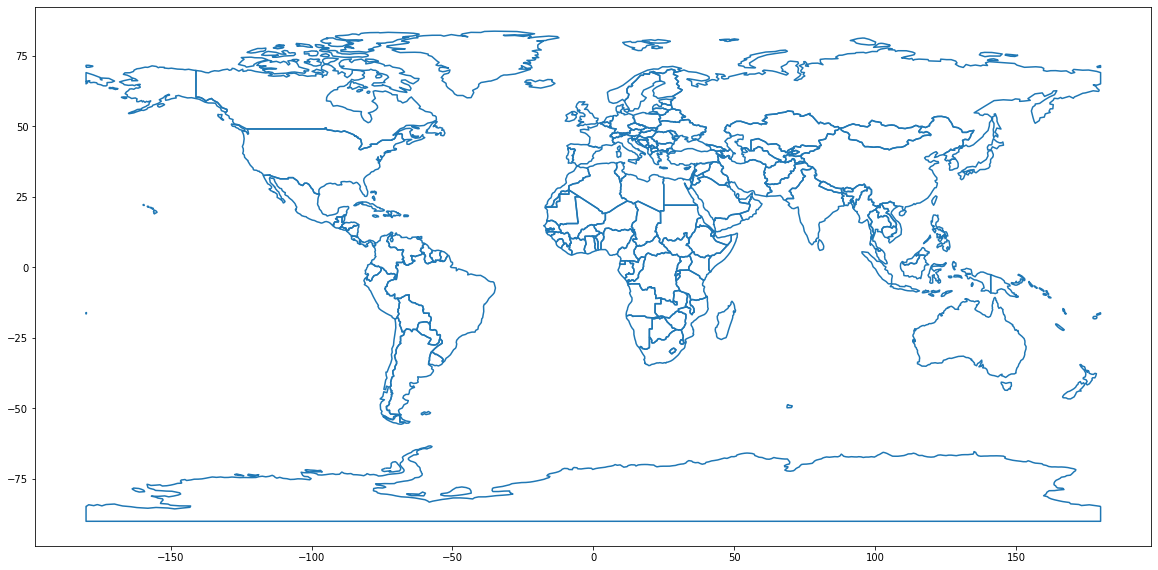

In [99]:
ax = df_world["geometry"].boundary.plot(figsize=(20,16))

In [100]:
#Function for plotting world map
def plot_map(df, column_name, title):
    fig, ax = plt.subplots(1, 1, figsize=(20, 16))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad="0.5%")
    df.plot(column=column_name, ax=ax, cax=cax, cmap='OrRd',

    legend=True, legend_kwds={"label": title}, missing_kwds={"color": "lightgrey", "edgecolor": "white", "hatch": "|"})
    plt.show()

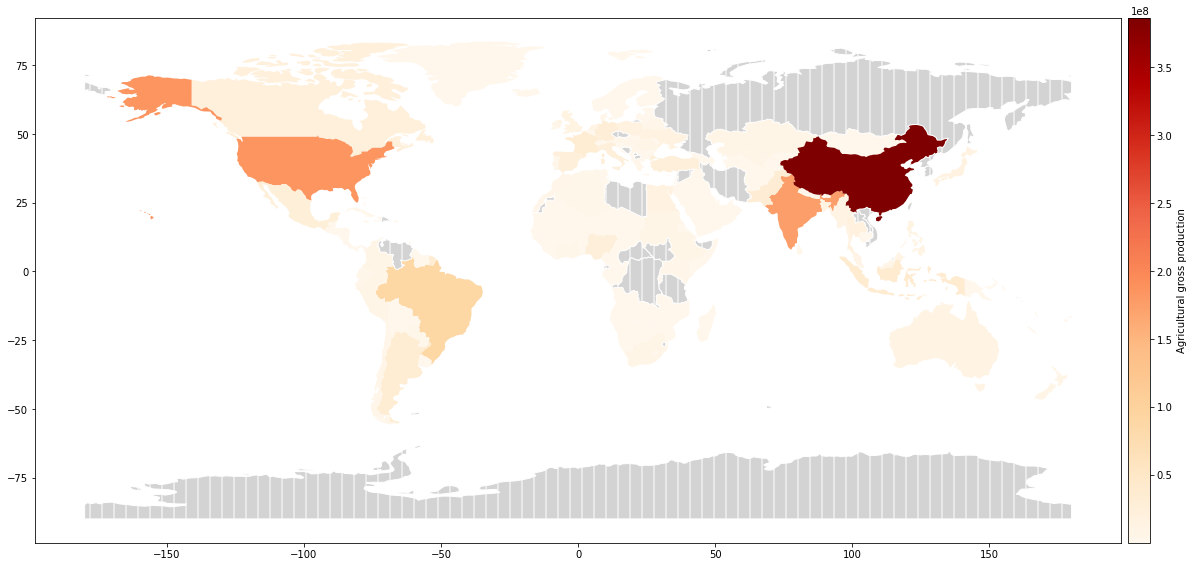

In [101]:
title = "Agricultural gross production"
plot_map(df_world_agri, "Gross_Production", title)

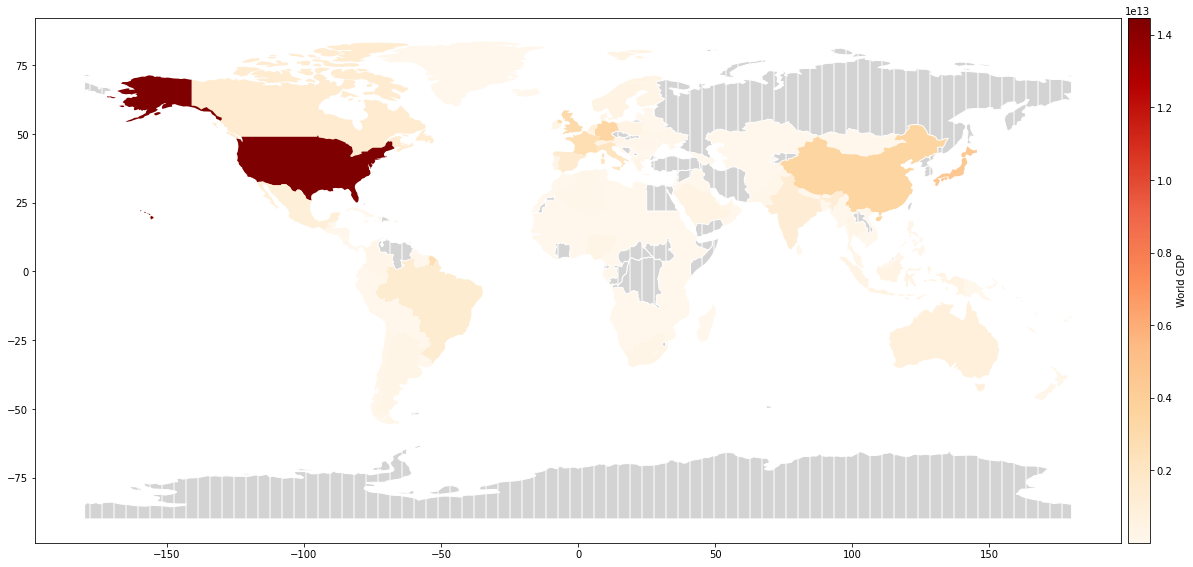

In [102]:
title = "World GDP"
plot_map(df_world_gdp, "GDP_USD", title)

Looking at the world map plots, I am assuming there is some correlation between GDP and agricultural production of each country. For example, USA, China, Brazil, India seem to have high GDP as well as agricultural production. Let's try to find out if there is any correlation.

In [103]:
#Merge the two datasets using country name and year
agri_data = focused_data[~focused_data.Country.str.endswith('+')]
merged_df = pd.merge(agri_data, world_gdp_data, left_on=['Country', 'Year'] , right_on=['Country Name', 'year'], how='inner')
#Remove duplicate columns in merged dataset
merged_df = merged_df.drop(['Country Name', 'year'], axis=1)
merged_df

,Country,Year,Gross_Production,Country Code,GDP_USD,GDP_per_capita_USD
0,Afghanistan,2007,2486910.0,AFG,9.747880e+09,359.693158
1,Afghanistan,2006,2278516.0,AFG,6.971286e+09,263.733602
2,Afghanistan,2005,2524097.0,AFG,6.209138e+09,242.031313
3,Afghanistan,2004,2226346.0,AFG,5.226779e+09,211.382074
4,Afghanistan,2003,2289434.0,AFG,4.515559e+09,190.683814
...,...,...,...,...,...,...
7305,Zimbabwe,1965,687546.0,ZWE,1.311436e+09,293.308788
7306,Zimbabwe,1964,740738.0,ZWE,1.217138e+09,281.558896
7307,Zimbabwe,1963,625430.0,ZWE,1.159512e+09,277.479715
7308,Zimbabwe,1962,679806.0,ZWE,1.117602e+09,276.688233


In [104]:
#Correlation calculation using Pearson method
correlation = merged_df['GDP_USD'].corr(merged_df['Gross_Production'], method='pearson')

print("Correlation between GDP and Gross Production:", correlation)

Correlation between GDP and Gross Production: 0.5271996525178846


Reference: https://www.scribbr.com/statistics/pearson-correlation-coefficient/
Pearson correlation coefficient (r) value	Strength	Direction
                            Greater than .5	Strong	Positive
                            Between .3 and .5	Moderate	Positive
                            Between 0 and .3	Weak	Positive
                                            0	None	None
                            Between 0 and –.3	Weak	Negative
                            Between –.3 and –.5	Moderate	Negative
                                Less than –.5	Strong	Negative
So, there is a strong positive correlation between a country's GDP and agricultural production.
As agricultural products increases, GDP also increases.
However, correlation does not imply causation, so further analysis is required.

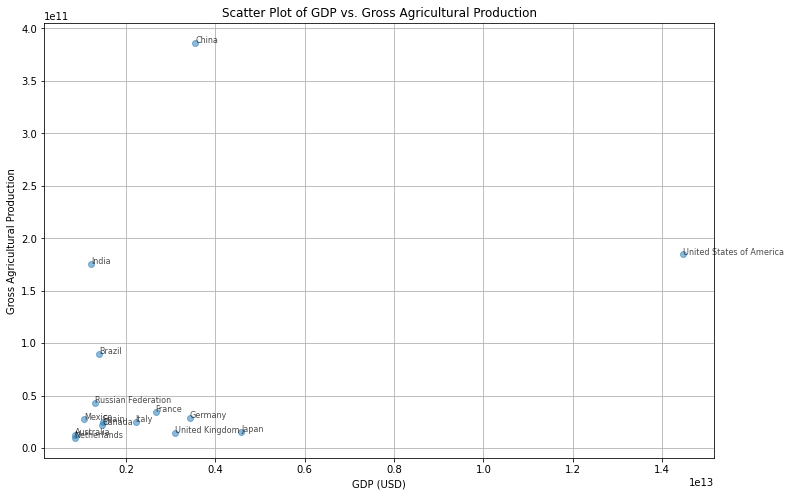

In [105]:
#Data visualization using scatterplots
merged_df['Gross_Production'] = merged_df['Gross_Production'] * 1000 #Since gross_production unit is in $1000
merged_df_2007 = merged_df[merged_df['Year'] == 2007]
top_n = 15
sorted_df = merged_df_2007.sort_values(by=['GDP_USD', 'Gross_Production'], ascending=[False, False]).head(top_n)

plt.figure(figsize=(12, 8))  # Set the figure size (width, height)
plt.scatter(sorted_df['GDP_USD'], sorted_df['Gross_Production'], alpha=0.5)  

# Set labels and title
plt.xlabel('GDP (USD)')
plt.ylabel('Gross Agricultural Production')
plt.title('Scatter Plot of GDP vs. Gross Agricultural Production')

# Add labels for each country
for i, row in sorted_df.iterrows():
    plt.annotate(row['Country'], (row['GDP_USD'], row['Gross_Production']), fontsize=8, alpha=0.7)
      
# Show the plot
plt.grid(True)  # Add grid lines
plt.show()


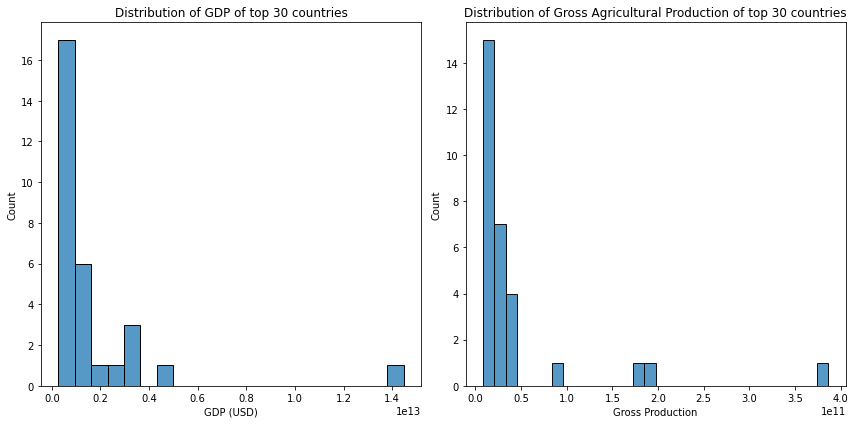

In [106]:
# Visualize data distributions using histograms
sorted_df_GDP = merged_df_2007.sort_values(by=['GDP_USD'], ascending=[False]).head(30)
sorted_df_Prod = merged_df_2007.sort_values(by=['Gross_Production'], ascending=[False]).head(30)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data = sorted_df_GDP['GDP_USD'])
plt.xlabel('GDP (USD)')
plt.title('Distribution of GDP of top 30 countries')

plt.subplot(1, 2, 2)
sns.histplot(data = sorted_df_Prod['Gross_Production'])
plt.xlabel('Gross Production')
plt.title('Distribution of Gross Agricultural Production of top 30 countries')

plt.tight_layout()
plt.show()


In [107]:
#Merge land data with the dataset
land_data = pd.read_csv('Dataset/archive/fao_data_land_data.csv')
land_data.drop(land_data[land_data['category'] != 'agricultural_area'].index, inplace = True)
land_data.dropna(inplace=True)
land_data = land_data[['country_or_area', 'year', 'value']]
land_data.columns = ['Country', 'Year', 'Area']
agri_land_data = land_data[~land_data['Country'].str.endswith('+')]

merged_df['Year'] = merged_df['Year'].astype(float) #To match dtype of 'Year' in agri_land_data
merged_df = pd.merge(merged_df, agri_land_data, left_on=['Country', 'Year'] , right_on=['Country', 'Year'], how='inner')
merged_df = merged_df.dropna()
merged_df

,Country,Year,Gross_Production,Country Code,GDP_USD,GDP_per_capita_USD,Area
0,Afghanistan,2007.0,2.486910e+09,AFG,9.747880e+09,359.693158,38661.0
1,Afghanistan,2006.0,2.278516e+09,AFG,6.971286e+09,263.733602,38659.0
2,Afghanistan,2005.0,2.524097e+09,AFG,6.209138e+09,242.031313,38515.0
3,Afghanistan,2004.0,2.226346e+09,AFG,5.226779e+09,211.382074,38064.0
4,Afghanistan,2003.0,2.289434e+09,AFG,4.515559e+09,190.683814,38899.0
...,...,...,...,...,...,...,...
7254,Zimbabwe,1965.0,6.875460e+08,ZWE,1.311436e+09,293.308788,11305.0
7255,Zimbabwe,1964.0,7.407380e+08,ZWE,1.217138e+09,281.558896,11240.0
7256,Zimbabwe,1963.0,6.254300e+08,ZWE,1.159512e+09,277.479715,11155.0
7257,Zimbabwe,1962.0,6.798060e+08,ZWE,1.117602e+09,276.688233,11070.0


In [108]:
Y_Prod = merged_df['Gross_Production']
X_Prod = merged_df[['Year', 'GDP_USD', 'Area']]

X_Prod = X_Prod.astype(float)  # Convert X to float 
Y_Prod = Y_Prod.astype(float)

X_Prod = sm.add_constant(X_Prod)
model = sm.OLS(Y_Prod, X_Prod).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Gross_Production   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     3167.
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:04:21   Log-Likelihood:            -1.5184e+05
No. Observations:                6109   AIC:                         3.037e+05
Df Residuals:                    6105   BIC:                         3.037e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.161e+11    2.9e+10     -4.005      0.0